# 🔹UFC Model Training

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from utils.metrics import *
from models.model_factory import *
from utils.io_model import *
from utils.helpers import *

## 2. Load Data

In [2]:
# Define the path to the CSV file
train_path = os.path.join(project_root, 'data', 'processed', 'ufc_train.csv')
test_path = os.path.join(project_root, 'data', 'processed', 'ufc_test.csv')

# Load the CSV into a DataFrame
ufc_train = pd.read_csv(train_path)
ufc_test = pd.read_csv(test_path)

print_header(f"Data Training successfully loaded: {ufc_train.shape[0]} rows, {ufc_train.shape[1]} columns.")
print_header(f"Data Testing successfully loaded: {ufc_test.shape[0]} rows, {ufc_test.shape[1]} columns.")

╔═════════════════════════════════════════════════════════════╗
║  Data Training successfully loaded: 5232 rows, 47 columns.  ║
╚═════════════════════════════════════════════════════════════╝
╔════════════════════════════════════════════════════════════╗
║  Data Testing successfully loaded: 1309 rows, 47 columns.  ║
╚════════════════════════════════════════════════════════════╝


## 3. 🔧 Hyperparameters Tuning 🔧

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

hyperparameter_tuning = True

if hyperparameter_tuning:
    model_params = {
    "svm": (
        SVC(probability=True),
        {'C': [0.1], 'kernel': ['linear'], 'gamma': ['scale']}
    ),
    "random_forest": (
        RandomForestClassifier(),
        {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
    ),
    "logistic_regression": (
        LogisticRegression(),
        {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    ),
    "knn": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    ),
    "adaboost": (
        AdaBoostClassifier(),
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
    ),
    "naive_bayes": (
        GaussianNB(),
        {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    ) }
else:
    model_params = None # Default Settings

## 4. 🔹 UFC Machine Learning Training

### 3.2 KNN Model Training

#### 🚀 KNN Training 

In [4]:
model_name = 'knn'
knn_model = model_factory(model_name, ufc_train, model_params)

INFO:root:[KNN] 🤖 Training...


+---------------------------------------+
|  [KNN] 📚 UFC GridSearchCV Training 📚  |
+---------------------------------------+
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.546 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.529 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.563 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.543 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.545 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.528 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weig

INFO:root:[KNN] 🔍 Best Score: 0.5789
[KNN] 🔍 Best Params: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}


#### KNN Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+-------------------------------------------------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}  |
+-------------------------------------------------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.5752
Precision: 0.4904
Recall: 0.2800
F1 score: 0.3565
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


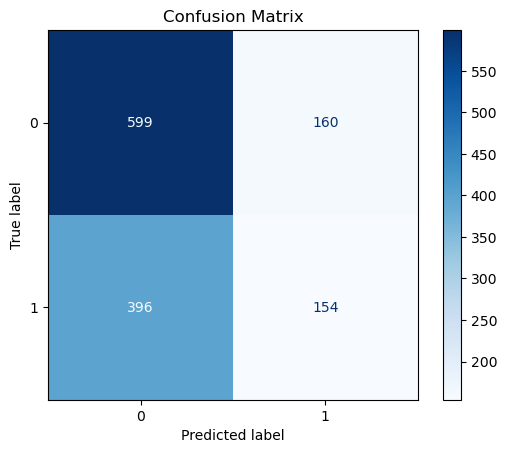

In [5]:
knn_metrics = evaluate_model(knn_model, ufc_test)

### 3.3 SVM Model 

#### 🚀 SVM Training 

In [6]:
model_name = 'svm'
svm_model = model_factory(model_name, ufc_train, model_params)

INFO:root:[SVM] 🤖 Training...


+---------------------------------------+
|  [SVM] 📚 UFC GridSearchCV Training 📚  |
+---------------------------------------+
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.607 total time=   5.3s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.604 total time=   4.9s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.595 total time=   5.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.594 total time=   4.9s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.587 total time=   5.0s


INFO:root:[SVM] 🔍 Best Score: 0.5973
[SVM] 🔍 Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


#### SVM Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+---------------------------------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  |
+---------------------------------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.6020
Precision: 0.6495
Recall: 0.1145
F1 score: 0.1947
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


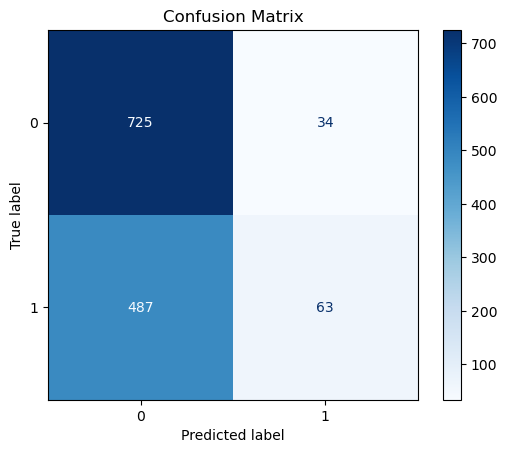

In [8]:
svm_metrics = evaluate_model(svm_model, ufc_test)

### 3.4 Logistic Regression Model

#### 🚀 Logistic Regression Training

In [10]:
model_name = 'logistic_regression'
lr_model = model_factory(model_name, ufc_train, model_params)

INFO:root:[LOGISTIC_REGRESSION] 🤖 Training...


+-------------------------------------------------------+
|  [LOGISTIC_REGRESSION] 📚 UFC GridSearchCV Training 📚  |
+-------------------------------------------------------+
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........C=0.001, solver=liblinear;, score=0.600 total time=   0.0s
[CV 2/5] END .........C=0.001, solver=liblinear;, score=0.586 total time=   0.0s
[CV 3/5] END .........C=0.001, solver=liblinear;, score=0.619 total time=   0.0s
[CV 4/5] END .........C=0.001, solver=liblinear;, score=0.589 total time=   0.0s
[CV 5/5] END .........C=0.001, solver=liblinear;, score=0.598 total time=   0.0s
[CV 1/5] END .............C=0.001, solver=lbfgs;, score=0.603 total time=   0.0s
[CV 2/5] END .............C=0.001, solver=lbfgs;, score=0.589 total time=   0.0s
[CV 3/5] END .............C=0.001, solver=lbfgs;, score=0.612 total time=   0.0s
[CV 4/5] END .............C=0.001, solver=lbfgs;, score=0.600 total time=   0.0s
[CV 5/5] END .............C=0.001, s

INFO:root:[LOGISTIC_REGRESSION] 🔍 Best Score: 0.6089
[LOGISTIC_REGRESSION] 🔍 Best Params: {'C': 1, 'solver': 'liblinear'}


#### Logistic Regression Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+----------------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'C': 1, 'solver': 'liblinear'}  |
+----------------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.6280
Precision: 0.6113
Recall: 0.3145
F1 score: 0.4154
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


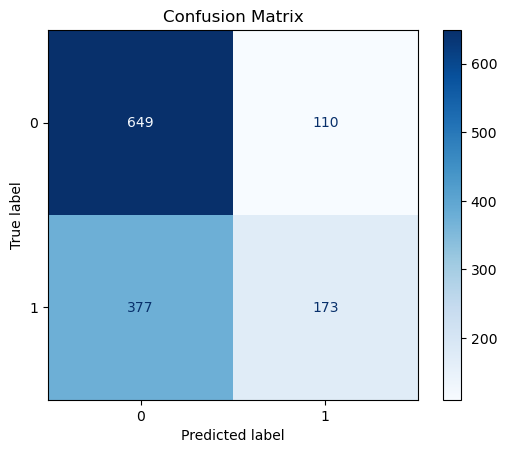

In [11]:
lr_metrics = evaluate_model(lr_model, ufc_test)

### 3.5 Random Forest Model

#### 🚀 Random Forest Training

In [12]:
model_name = 'random_forest'
rf_model = model_factory(model_name, ufc_train)

INFO:root:[RANDOM_FOREST] 🤖 Training...


+-------------------------------------------------+
|  [RANDOM_FOREST] 📚 UFC GridSearchCV Training 📚  |
+-------------------------------------------------+
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.597 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.590 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.595 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.582 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.588 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.593 total time=   0.2s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.592 total time=   0.2s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.587 total time=   0.2s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.586 total time=   0.2s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score

INFO:root:[RANDOM_FOREST] 🔍 Best Score: 0.6057
[RANDOM_FOREST] 🔍 Best Params: {'max_depth': 5, 'n_estimators': 50}


#### Random Forest Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+---------------------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'max_depth': 5, 'n_estimators': 50}  |
+---------------------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.5966
Precision: 0.6122
Recall: 0.1091
F1 score: 0.1852
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


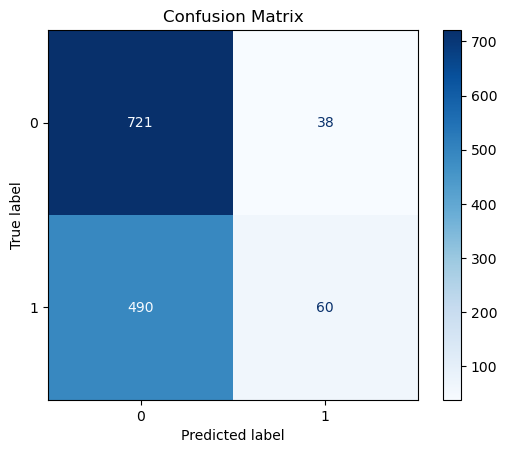

In [13]:
rf_metrics = evaluate_model(rf_model, ufc_test)

### 3.6 AdaBoost Model

#### 🚀 AdaBoost Training

In [14]:
model_name = 'adaboost'
adaboost_model = model_factory(model_name, ufc_train)

INFO:root:[ADABOOST] 🤖 Training...


+--------------------------------------------+
|  [ADABOOST] 📚 UFC GridSearchCV Training 📚  |
+--------------------------------------------+
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=0.581 total time=   0.1s
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 5/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.581 total time=   0.5s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.58

INFO:root:[ADABOOST] 🔍 Best Score: 0.5988
[ADABOOST] 🔍 Best Params: {'learning_rate': 1.0, 'n_estimators': 100}


#### AdaBoost Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+----------------------------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'learning_rate': 1.0, 'n_estimators': 100}  |
+----------------------------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.6073
Precision: 0.5559
Recall: 0.3255
F1 score: 0.4106
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


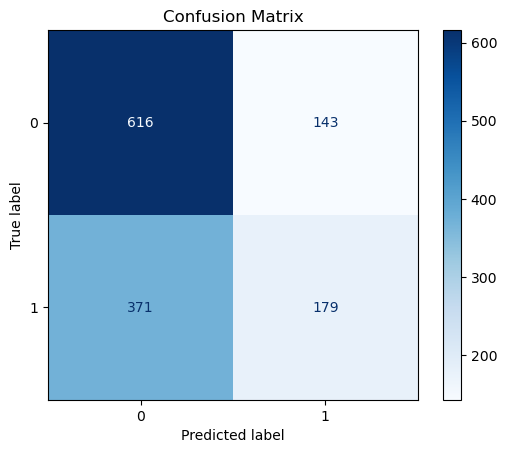

In [16]:
adaboost_metrics = evaluate_model(adaboost_model, ufc_test)

### 3.7 Naive Bayes Model

#### 🚀 Naive Bayes Training

In [17]:
model_name = 'naive_bayes'
nb_model = model_factory(model_name, ufc_train)

INFO:root:[NAIVE_BAYES] 🤖 Training...


+-----------------------------------------------+
|  [NAIVE_BAYES] 📚 UFC GridSearchCV Training 📚  |
+-----------------------------------------------+
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.429 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.579 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.432 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.579

INFO:root:[NAIVE_BAYES] 🔍 Best Score: 0.5461
[NAIVE_BAYES] 🔍 Best Params: {'var_smoothing': 1e-06}


#### Naive Bayes Metrics

+------------------------------------------------+
|  📊 Starting Evaluation for: Grid Search C V ✅  |
+------------------------------------------------+
+---------------------------------------------------------------------+
|  🚀 Best Parameters Found with GridSearch: {'var_smoothing': 1e-06}  |
+---------------------------------------------------------------------+
+---------------------------------------------------------------------------------------------------+
|  🔍 Model Evaluation Metrics:
Accuracy: 0.5982
Precision: 0.5276
Recall: 0.4164
F1 score: 0.4654
  |
+---------------------------------------------------------------------------------------------------+
╔════════════════════════╗
║  📊 Confusion Matrix:📊  ║
╚════════════════════════╝


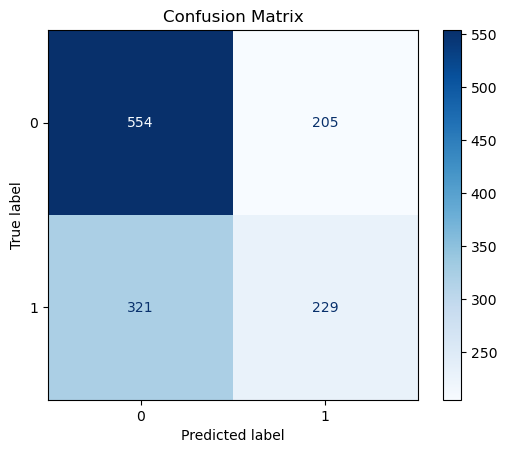

In [18]:
nb_metrics = evaluate_model(nb_model, ufc_test)

## 4. Save

In [19]:
save_model(knn_model, name='knn_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/knn_best.pkl


In [20]:
save_model(svm_model, name='svm_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/svm_best.pkl


In [21]:
save_model(lr_model, name='lr_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/lr_best.pkl


In [22]:
save_model(rf_model, name='rf_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/rf_best.pkl


In [23]:
save_model(adaboost_model, name='adaboost_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/adaboost_best.pkl


In [24]:
save_model(nb_model, name='nb_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/nb_best.pkl
